In [6]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from graphs import Graphs

from platform import python_version
print(python_version())


3.9.7


# Reading in the survey data from the csv file
This will also prepare the data for graphing

In [7]:
s_data = pd.read_csv('surveydata.csv')

#Step 1 Localise the data
title_data = "How rested or refreshed do you feel when you wake up for the day?"
data_bar = s_data[title_data] #Note When Using How - usualy categorical data from 1-5, what is usaully some other type
frequency = data_bar.value_counts(sort=False).sort_index(ascending=True).to_numpy() #Extracts the frequncy of responses per category
ypos =  np.arange(len(frequency)) #Automatically assigns indexs for each number in the data

temp = data_bar.unique() #Extracted range of different rows
temp = np.sort(temp)  #Sorting Range into order


# Graphing a barchart

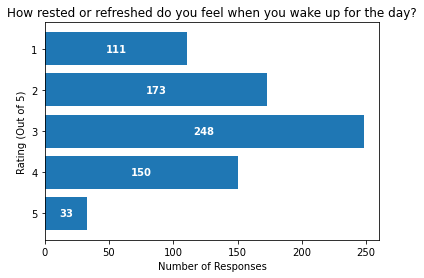

In [8]:
from graphs import Graphs


gph = Graphs()
# gph.graph_bar(title="How rested or refreshed do you feel when you wake up for the day?", title_x="Number of Responses", title_y="Rating (Out of 5)", data_x=frequency, data_y=ypos, label_y=temp)
gph.graph_bar(title="How rested or refreshed do you feel when you wake up for the day?", title_x="Number of Responses", title_y="Rating (Out of 5)", data_x=frequency, label_y=temp)

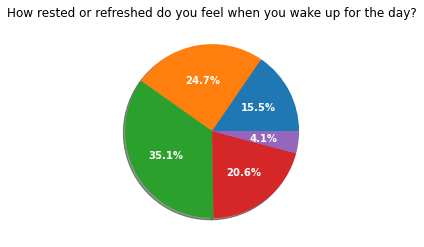

In [9]:
gph.graph_pie(title="How rested or refreshed do you feel when you wake up for the day?", data=frequency, labels=temp)